In [56]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from scipy.stats import randint, uniform




In [4]:

def extract_cv_results(algorithm_folder, model_names):
    nested_folder = "Version 2"
    dfs = []

    for model_name in model_names:
        # Construct the path for the feature importance CSV file
        csv_path = os.path.join(
            "/home/siti/Downloads/New Modelling", 
            algorithm_folder, 
            nested_folder,
            model_name, 
            "cv_results.csv"
        )
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_path)
        
        # Add a 'Model' column to keep track of the model
        df['Model'] = model_name
        df['Algorithm'] = algorithm_folder.split('_')[0]

        # Add the DataFrame to the list
        dfs.append(df)
        
    # Concatenate all DataFrames
    all_df = pd.concat(dfs, ignore_index=True)
    
    return all_df


In [62]:
# Set model names
model_names = ["Model 1", "Model 2", "Model 3", "Model 4"]

# Call the function and pass the algorithm folder name
all_DT_df = extract_cv_results("DT_folder", model_names)

all_RF_df = extract_cv_results("RandomForest_folder", model_names)

all_XGBoost_df = extract_cv_results("XGBoost_folder", model_names)

all_LR_df = extract_cv_results("LogisticRegression_folder", model_names)

In [6]:
all_DT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_fit_time            200 non-null    float64
 1   std_fit_time             200 non-null    float64
 2   mean_score_time          200 non-null    float64
 3   std_score_time           200 non-null    float64
 4   param_splitter           200 non-null    object 
 5   param_min_samples_split  200 non-null    int64  
 6   param_min_samples_leaf   200 non-null    int64  
 7   param_max_depth          164 non-null    float64
 8   param_criterion          200 non-null    object 
 9   param_ccp_alpha          150 non-null    float64
 10  params                   200 non-null    object 
 11  split0_test_score        200 non-null    float64
 12  split1_test_score        200 non-null    float64
 13  split2_test_score        200 non-null    float64
 14  split3_test_score        2

In [7]:
all_DT_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_ccp_alpha,...,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,Model,Algorithm
0,128.105021,0.819679,0.081775,0.004776,random,5,2,50.0,entropy,0.01,...,0.760681,0.789678,0.792942,0.793802,0.785658,0.784552,0.012274,14,Model 1,DT
1,88.250526,2.085211,0.079782,0.011708,best,5,2,NaN,entropy,0.10,...,0.708899,0.710639,0.709108,0.707660,0.708434,0.708948,0.000981,18,Model 1,DT
2,47.724673,1.357929,0.063417,0.003543,random,10,2,40.0,gini,0.20,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,27,Model 1,DT
3,12.963943,0.079956,0.071828,0.003985,best,2,4,20.0,entropy,0.10,...,0.708899,0.710639,0.709108,0.707660,0.708434,0.708948,0.000981,18,Model 1,DT
4,102.171351,4.871660,0.066732,0.003493,random,2,2,40.0,entropy,0.30,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,27,Model 1,DT


In [9]:
all_DT_df['Model'].unique()
all_DT_df['param_splitter']

0      random
1        best
2      random
3        best
4      random
        ...  
195    random
196    random
197    random
198      best
199    random
Name: param_splitter, Length: 200, dtype: object

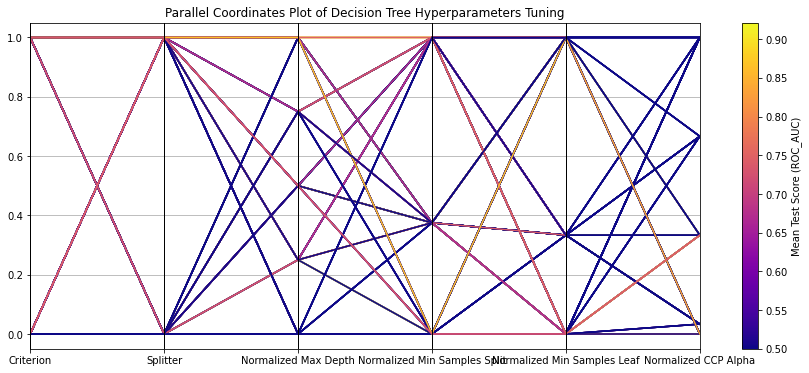

In [60]:
# Map categorical variables to integers
all_DT_df['param_criterion_num'] = all_DT_df['param_criterion'].map({'gini': 0, 'entropy': 1})
all_DT_df['param_splitter_num'] = all_DT_df['param_splitter'].map({'best': 0, 'random': 1})

# Normalize mean_test_score to scale 0-1 for the color map
all_DT_df['norm_mean_test_score'] = (all_DT_df['mean_test_score'] - all_DT_df['mean_test_score'].min()) / \
                                    (all_DT_df['mean_test_score'].max() - all_DT_df['mean_test_score'].min())

# Normalize the hyperparameters
hyperparam_cols = [
    'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'param_ccp_alpha'
]
for col in hyperparam_cols:
    all_DT_df[f"norm_{col}"] = (all_DT_df[col] - all_DT_df[col].min()) / (all_DT_df[col].max() - all_DT_df[col].min())

# Define columns to plot
columns_to_plot = [
    'param_criterion_num', 'param_splitter_num', 'norm_param_max_depth',
    'norm_param_min_samples_split', 'norm_param_min_samples_leaf', 'norm_param_ccp_alpha', 'mean_test_score'
]

# Define custom labels
custom_labels = [
    'Criterion', 'Splitter', 'Normalized Max Depth',
    'Normalized Min Samples Split', 'Normalized Min Samples Leaf', 'Normalized CCP Alpha'
]

# Create the parallel coordinates plot
plt.figure(figsize=(15, 6))
ax = pd.plotting.parallel_coordinates(
    all_DT_df[columns_to_plot],
    'mean_test_score',  
    color=cm.plasma(all_DT_df['norm_mean_test_score']),  
    axvlines=True
)

# Set custom axis labels
ax.set_xticklabels(custom_labels)

plt.title("Parallel Coordinates Plot of Decision Tree Hyperparameters Tuning")
ax.legend().set_visible(False)  # Hide the legend

# Add color scale (colorbar)
norm = Normalize(vmin=all_DT_df['mean_test_score'].min(), vmax=all_DT_df['mean_test_score'].max())
sm = cm.ScalarMappable(cmap='plasma', norm=norm)  
sm.set_array([])
plt.colorbar(sm, label='Mean Test Score (ROC_AUC)')


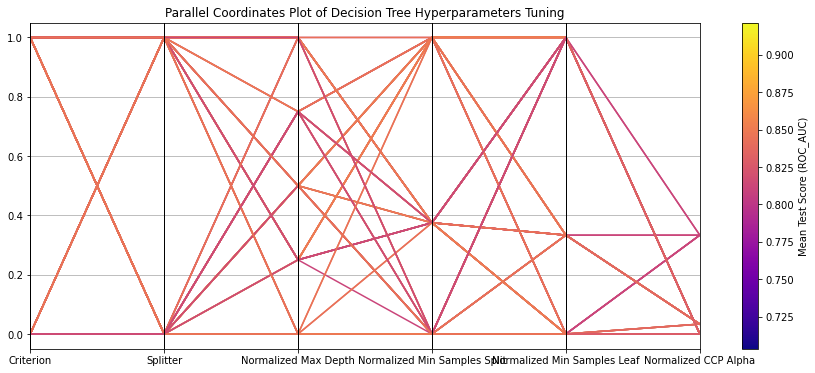

In [63]:
# Map categorical variables to integers
all_DT_df['param_criterion_num'] = all_DT_df['param_criterion'].map({'gini': 0, 'entropy': 1})
all_DT_df['param_splitter_num'] = all_DT_df['param_splitter'].map({'best': 0, 'random': 1})

# Normalize mean_test_score to scale 0-1 for the color map
all_DT_df['norm_mean_test_score'] = (all_DT_df['mean_test_score'] - all_DT_df['mean_test_score'].min()) / \
                                    (all_DT_df['mean_test_score'].max() - all_DT_df['mean_test_score'].min())

# Normalize the hyperparameters
hyperparam_cols = [
    'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'param_ccp_alpha'
]
for col in hyperparam_cols:
    all_DT_df[f"norm_{col}"] = (all_DT_df[col] - all_DT_df[col].min()) / (all_DT_df[col].max() - all_DT_df[col].min())


# Filter to only include rows with mean_test_score (ROC_AUC) above 0.70
filtered_df = all_DT_df[all_DT_df['mean_test_score'] > 0.70]

# Define columns to plot
columns_to_plot = [
    'param_criterion_num', 'param_splitter_num', 'norm_param_max_depth',
    'norm_param_min_samples_split', 'norm_param_min_samples_leaf', 'norm_param_ccp_alpha', 'mean_test_score'
]

# Define custom labels
custom_labels = [
    'Criterion', 'Splitter', 'Normalized Max Depth',
    'Normalized Min Samples Split', 'Normalized Min Samples Leaf', 'Normalized CCP Alpha'
]

# Create the parallel coordinates plot
plt.figure(figsize=(15, 6))
ax = pd.plotting.parallel_coordinates(
    filtered_df[columns_to_plot],
    'mean_test_score',
    color=cm.plasma(filtered_df['norm_mean_test_score']),
    axvlines=True
)

# Set custom axis labels
ax.set_xticklabels(custom_labels)

plt.title("Parallel Coordinates Plot of Decision Tree Hyperparameters Tuning")
ax.legend().set_visible(False)  # Hide the legend

# Add color scale (colorbar)
norm = Normalize(vmin=filtered_df['mean_test_score'].min(), vmax=filtered_df['mean_test_score'].max())
sm = cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Mean Test Score (ROC_AUC)')

plt.show()

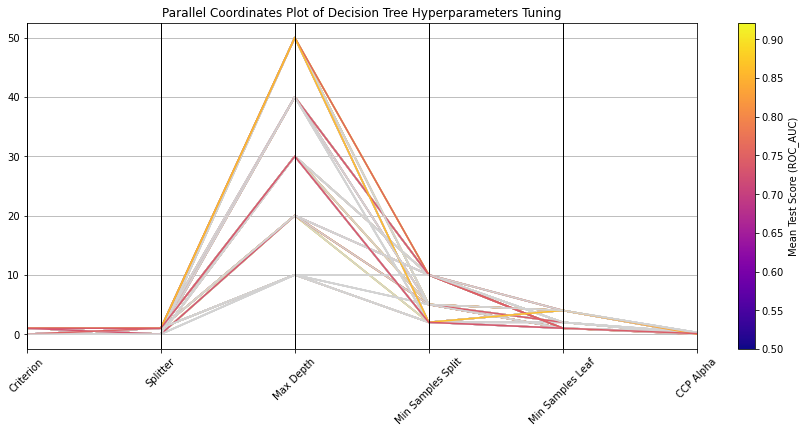

In [61]:
# Your all_DT_df DataFrame preparation code here...
# ... (Normalization and Mapping steps)
# Map categorical variables to integers
all_DT_df['param_criterion_num'] = all_DT_df['param_criterion'].map({'gini': 0, 'entropy': 1})
all_DT_df['param_splitter_num'] = all_DT_df['param_splitter'].map({'best': 0, 'random': 1})

# Normalize mean_test_score to scale 0-1 for the color map
all_DT_df['norm_mean_test_score'] = (all_DT_df['mean_test_score'] - all_DT_df['mean_test_score'].min()) / \
                                    (all_DT_df['mean_test_score'].max() - all_DT_df['mean_test_score'].min())

# Normalize the hyperparameters
hyperparam_cols = [
    'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'param_ccp_alpha'
]
for col in hyperparam_cols:
    all_DT_df[f"norm_{col}"] = (all_DT_df[col] - all_DT_df[col].min()) / (all_DT_df[col].max() - all_DT_df[col].min())

# Function to return appropriate color based on ROC-AUC score
def get_color(value, cmap, norm):
    if value > 0.7:
        return cmap(norm(value))
    else:
        return 'lightgray'  # Muted color for scores below 0.7

# Create the colormap and normalize based on your data range
cmap = cm.plasma
norm = Normalize(vmin=all_DT_df['mean_test_score'].min(), vmax=all_DT_df['mean_test_score'].max())

# Define columns to plot
columns_to_plot = [
    'param_criterion_num', 'param_splitter_num', 'param_max_depth',
    'param_min_samples_split', 'param_min_samples_leaf', 'param_ccp_alpha', 'mean_test_score'
]

# Define custom labels
custom_labels = [
    'Criterion', 'Splitter', 'Max Depth',
    'Min Samples Split', 'Min Samples Leaf', 'CCP Alpha'
]

# Create the parallel coordinates plot
plt.figure(figsize=(15, 6))
ax = pd.plotting.parallel_coordinates(
    all_DT_df[columns_to_plot],
    'mean_test_score',
    color=[get_color(x, cmap, norm) for x in all_DT_df['mean_test_score']],
    axvlines=True
)

# Set custom axis labels and rotate them
ax.set_xticklabels(custom_labels, rotation=45)

plt.title("Parallel Coordinates Plot of Decision Tree Hyperparameters Tuning")
ax.legend().set_visible(False)  # Hide the legend

# Add color scale (colorbar)
sm = cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Mean Test Score (ROC_AUC)')

plt.show()

In [49]:
all_RF_df.info()
all_RF_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_fit_time            200 non-null    float64
 1   std_fit_time             200 non-null    float64
 2   mean_score_time          200 non-null    float64
 3   std_score_time           200 non-null    float64
 4   param_bootstrap          200 non-null    bool   
 5   param_max_depth          200 non-null    int64  
 6   param_max_features       200 non-null    object 
 7   param_min_samples_leaf   200 non-null    float64
 8   param_min_samples_split  200 non-null    float64
 9   param_n_estimators       200 non-null    int64  
 10  params                   200 non-null    object 
 11  split0_test_score        200 non-null    float64
 12  split1_test_score        200 non-null    float64
 13  split2_test_score        200 non-null    float64
 14  split3_test_score        2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,Model,Algorithm
0,25.773260,0.190757,1.747309,0.014310,True,4,sqrt,0.191717,0.801722,120,...,0.500000,0.50000,0.500000,0.500000,0.500000,0.500000,0.000000,28,Model 1,RandomForest
1,36.423985,3.051450,2.576005,0.058200,True,3,sqrt,0.129042,0.879559,199,...,0.500000,0.50000,0.500000,0.500000,0.500000,0.500000,0.000000,28,Model 1,RandomForest
2,174.306104,2.936258,6.363093,0.074860,False,8,sqrt,0.110292,0.972919,393,...,0.767999,0.76837,0.768169,0.766862,0.768790,0.768038,0.000645,2,Model 1,RandomForest
3,212.679682,6.947450,5.702675,0.115237,False,5,sqrt,0.252121,0.572281,335,...,0.757324,0.76067,0.759337,0.757836,0.759213,0.758876,0.001186,3,Model 1,RandomForest
4,45.002230,1.931962,3.462144,0.120662,True,1,sqrt,0.405926,0.225544,287,...,0.500000,0.50000,0.500000,0.500000,0.500000,0.500000,0.000000,28,Model 1,RandomForest


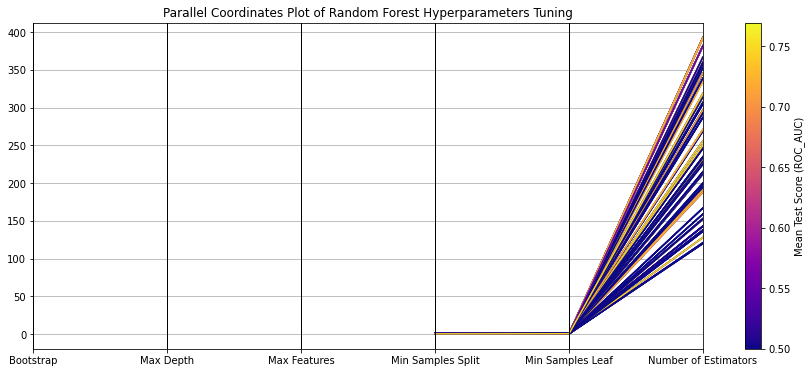

In [59]:
from matplotlib.axis import Axis  # Import the Axis class from matplotlib.axis
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import pandas as pd

# Your DataFrame and preprocessing steps here...

# Create the parallel coordinates plot
plt.figure(figsize=(15, 6))
ax = pd.plotting.parallel_coordinates(
    all_RF_df[columns_to_plot],
    'mean_test_score',  # Using mean_test_score directly as it is ROC_AUC score
    color=cm.plasma(all_RF_df['norm_mean_test_score']),
    axvlines=True
)

# Define custom tick values for each axis
tick_values = {
    'param_bootstrap': [0, 1],
    'param_max_depth': [10, 20, 30, 40, 50],
    'param_max_features': [0, 1],
    'param_min_samples_split': [0.1, 0.2, 0.5, 0.7],
    'param_min_samples_leaf': [0.1, 0.2, 0.5, 0.7],
    'param_n_estimators': [100, 200, 300, 400]
}

# Set custom axis labels
ax.set_xticklabels(custom_labels)

# Find the axes children for the parallel coordinates plot
children = ax.get_children()

# Loop through each axis and set its tick labels
for i, label in enumerate(custom_labels):
    axis = [c for c in children if isinstance(c, Axis) and c.get_label() == columns_to_plot[i]]
    if axis:
        axis = axis[0]
        values = tick_values.get(columns_to_plot[i], [])
        axis.set_xticks(values)
        axis.set_xticklabels(values)

plt.title("Parallel Coordinates Plot of Random Forest Hyperparameters Tuning")
ax.legend().set_visible(False)  # Hide the legend

# Add color scale (colorbar)
norm = Normalize(vmin=all_RF_df['mean_test_score'].min(), vmax=all_RF_df['mean_test_score'].max())
sm = cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Mean Test Score (ROC_AUC)')

plt.show()
